In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

import json
import git
from collections import defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
cd ../cf-graph-countyfair/

/home/christopher/dev/conda-forge/cf-graph-countyfair


In [37]:
license_lengths = {}

In [38]:
repo = git.Repo('.')
ggit = repo.git

In [39]:
for commit in tqdm(repo.iter_commits(rev='afaec18c2667f94cd06c6ed3e4c39a076e8acf14...master')):
    timestamp = commit.committed_date
    ggit.checkout(commit)
    a = !wc -l status/unlicensed.json
    license_lengths[timestamp] = int(a[0].split(' ')[0])

6623it [44:26,  2.48it/s]


In [70]:
cd ../by-the-numbers

/home/christopher/dev/conda-forge


In [40]:
len(license_lengths)

6623

In [56]:
df = pd.DataFrame.from_dict([{'time': k, 'count': v} for k, v in license_lengths.items()])

In [57]:
df.head()

,time,count
0,1589937004,441
1,1589935976,441
2,1589935631,441
3,1589935549,441
4,1589934341,441


In [58]:
df.index = pd.to_datetime(df['time'], unit='s')

In [59]:
df.index = pd.to_datetime(df.index, utc=True)

In [60]:
df.index = pd.DatetimeIndex(df.index)

In [61]:
df.head()

,time,count
time,,
2020-05-20 01:10:04+00:00,1589937004,441
2020-05-20 00:52:56+00:00,1589935976,441
2020-05-20 00:47:11+00:00,1589935631,441
2020-05-20 00:45:49+00:00,1589935549,441
2020-05-20 00:25:41+00:00,1589934341,441


In [77]:
df3 = df.resample('D').mean()

In [78]:
df3.head()

,time,count
time,,
2019-10-09 00:00:00+00:00,1.570649e+09,688.000000
2019-10-10 00:00:00+00:00,1.570709e+09,687.230769
2019-10-11 00:00:00+00:00,1.570795e+09,686.000000
2019-10-12 00:00:00+00:00,1.570881e+09,685.000000
2019-10-13 00:00:00+00:00,1.570967e+09,685.000000


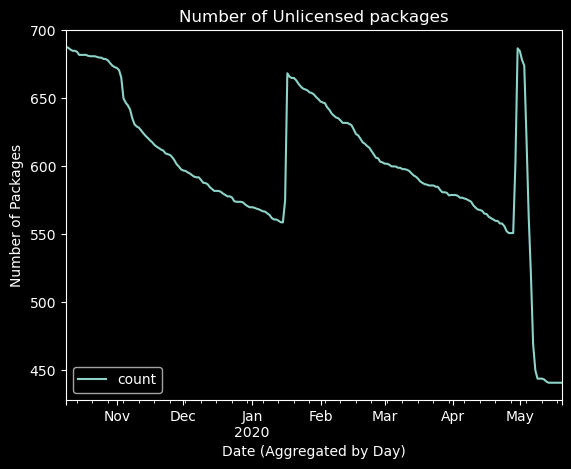

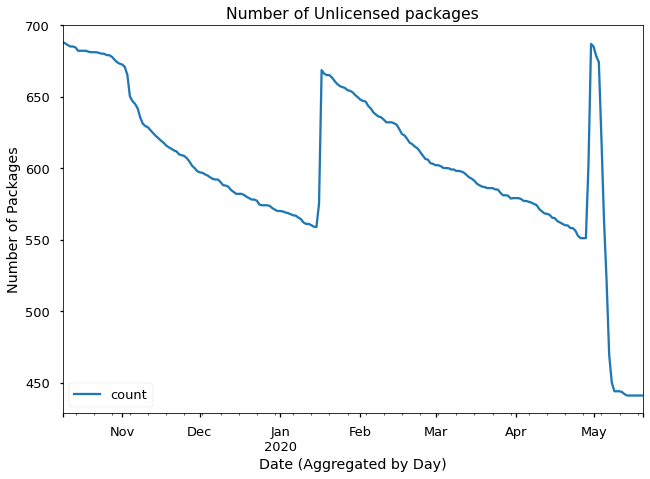

In [80]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3.plot(y='count', ax=ax)
        ax.set_title(f"Number of Unlicensed packages")
        ax.set_xlabel("Date (Aggregated by Day)")
        ax.set_ylabel("Number of Packages")
        fig.savefig(f"plots/license.png", bbox_inches='tight', transparent=True)
    